#Proyecto Data Science

## Abstract

El Dataset escogido contiene datos (2392  filas y 15 columnas) de estudiantes universitarios y diversos factores que influyen en la calificación final del examen. Entre los factores que son registrados en este conjunto de datos se pueden encontrar antecedentes familiares, económicos, académicos, entre otros.

Haciendo uso de estos datos sea desea conocer cuales son los factores más influyentes en las calificaciones de los estudiantes para lograr de esta manera conocer en qué aspectos sería posible brindar apoyo a los estudiantes para que obtengan mejores calificaciones.

Utilizando el algoritmo Random Forest se crea un modelo clasificador multiclase que presenta buen desempeño para las clasificaciones bajas, pero poco preciso para las calificaciones altas debido a desbalanceo de la variable objetivo

## Hipótesis


Para el set de datos utilizado se realizan las siguientes hipótesis sobre las calificaciones de los estudiantes:


1.   La cantidad de horas de estudio y ausencia a clases de los estudiantes son uno de los factores más importantes en las calificaciones de los estudiantes.
2.   Existen variables que influyen en las calificaciones de los estudiantes, pero por si solas no es evidente su contribución.

## Modelo Analítico

### Contexto Analítico

Para el conjunto de datos seleccionado, se desarrolla un modelo de clasificación multivariable con el objetivo de predecir las calificaciones de los estudiantes. La variable objetivo es la columna GradeClass, la cual categoriza las calificaciones en cinco niveles: A, B, C, D y F, donde A representa la mejor calificación y F la peor. Para la construcción del modelo clasificador, se emplea el algoritmo de Random Forest

### Contexto Comercial

En el ámbito educativo, las instituciones buscan continuamente mejorar el rendimiento académico de sus estudiantes. La identificación temprana de aquellos que puedan enfrentar dificultades académicas es crucial para implementar intervenciones efectivas y personalizadas. Las calificaciones de los estudiantes están influenciadas por una variedad de factores, que van desde el entorno familiar y socioeconómico hasta las metodologías de enseñanza y el bienestar emocional. Al analizar estas variables y entender su impacto en las calificaciones, las instituciones educativas pueden diseñar estrategias más acertadas y focalizadas, optimizando así los recursos disponibles y promoviendo un entorno de aprendizaje más inclusivo y eficaz.

### Problema comercial

Se desea conocer los factores principales que influyen en las calificaciones de los estudiantes de escuela secundaria y poder predecir cual es la calificación mas probable de los alumnos en base a las variables analizadas.

Esto puede ser de gran ayuda para las insituciones educativas para identificar mas facilmente los alumnos que podrían experimentar dificultades y conocer en qué aspecto es mas efectivo brindar apoyo.

## Carga del Dataset

In [74]:
#Importar Librerías
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [75]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('Student_performance_data.csv', delimiter = ',')

# Imprimir las primeras 10 filas del dataset
print(df.head(10))

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   
5       1006   18       0          0                  1         8.191219   
6       1007   15       0          1                  1        15.601680   
7       1008   15       1          1                  4        15.424496   
8       1009   17       0          0                  0         4.562008   
9       1010   16       1          0                  1        18.444466   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0    

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [77]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Descripción de las Columnas:


- **StudentID**: Un identificador único asignado a cada estudiante (1001 a 3392).
- **Age**: La edad de los estudiantes varía de 15 a 18 años.
- **Gender**: Género de los estudiantes, donde 0 representa Masculino y 1 representa Femenino.
- **Ethnicity**: La etnicidad de los estudiantes, codificada de la siguiente manera:
  - 0: Caucásico
  - 1: Afroamericano
  - 2: Asiático
  - 3: Otro
- **ParentalEducation**: El nivel de educación de los padres, codificado de la siguiente manera:
  - 0: Ninguna
  - 1: Secundaria
  - 2: Algo de Universidad
  - 3: Licenciatura
  - 4: Superior
- **StudyTimeWeekly**: Tiempo de estudio semanal en horas, que varía de 0 a 20.
- **Absences**: Número de ausencias durante el año escolar, que varía de 0 a 30.
- **Tutoring**: Estado de tutoría, donde 0 indica No y 1 indica Sí.
- **ParentalSupport**: El nivel de apoyo parental, codificado de la siguiente manera:
  - 0: Ninguno
  - 1: Bajo
  - 2: Moderado
  - 3: Alto
  - 4: Muy Alto
- **Extracurricular**: Participación en actividades extracurriculares, donde 0 indica No y 1 indica Sí.
- **Sports**: Participación en deportes, donde 0 indica No y 1 indica Sí.
- **Music**: Participación en actividades musicales, donde 0 indica No y 1 indica Sí.
- **Volunteering**: Participación en voluntariado, donde 0 indica No y 1 indica Sí.
- **GPA**: Promedio de Calificaciones en una escala de 2.0 a 4.0, influenciado por los hábitos de estudio, la participación parental y las actividades extracurriculares.
- **GradeClass**: Clasificación de las calificaciones de los estudiantes basada en el GPA:
  - 0: 'A' (GPA >= 3.5)
  - 1: 'B' (3.0 <= GPA < 3.5)
  - 2: 'C' (2.5 <= GPA < 3.0)
  - 3: 'D' (2.0 <= GPA < 2.5)
  - 4: 'F' (GPA < 2.0)


## Análisis Exploratorio de Datos

### Histograma de variables numéricas

Se desea conocer mejor la distribución de las variables numéricas. Para esto se crean histogramas de todas las variables numéricas utilizando la siguiente expresión.

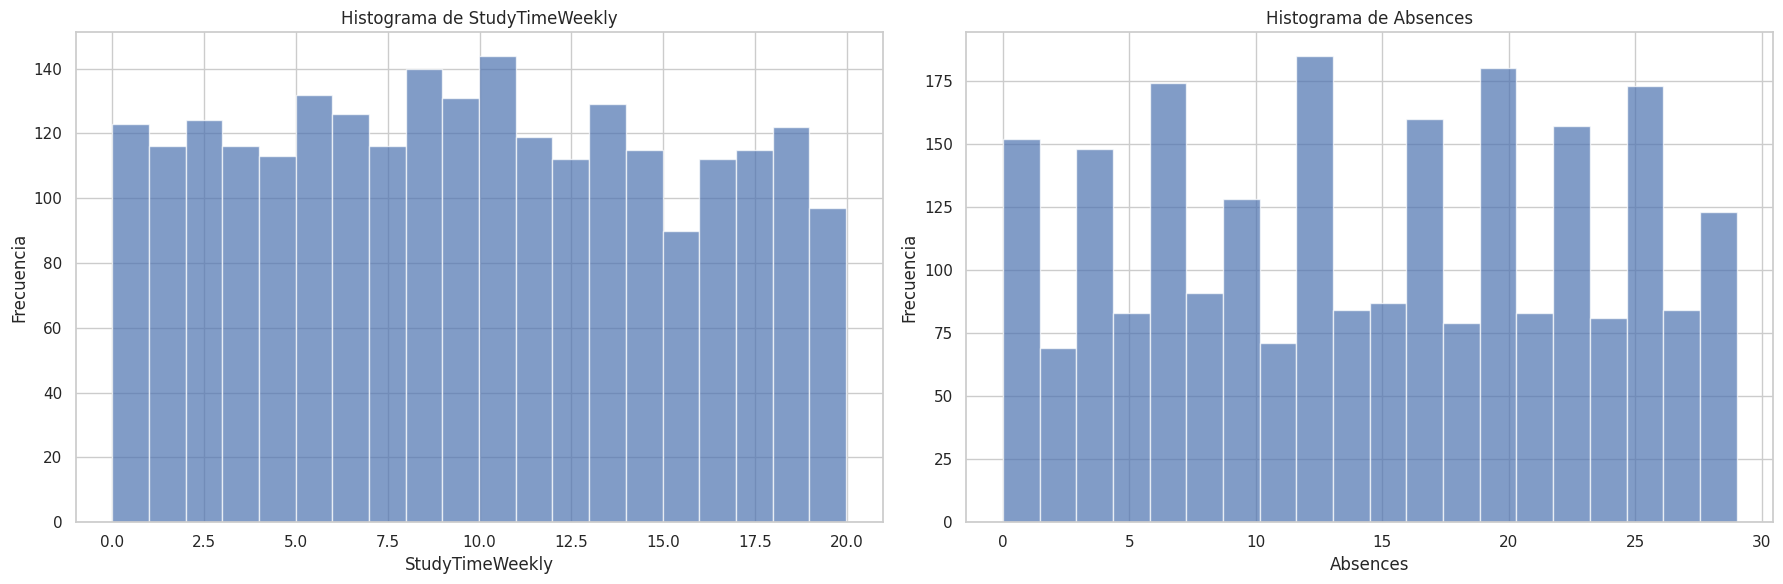

In [78]:
# Lista de columnas numéricas
numerical_columns = ['StudyTimeWeekly', 'Absences']

# Determinar el número de filas necesarias
num_cols = 2
num_rows = math.ceil(len(numerical_columns) / num_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

# Asegurarse de que axes sea una matriz bidimensional incluso si hay una sola fila
axes = axes.reshape(-1, num_cols)

# Crear un histograma para cada columna numérica
for idx, column in enumerate(numerical_columns):
    ax = axes[idx // num_cols, idx % num_cols]
    df[column].plot.hist(ax=ax, bins=20, alpha=0.7)
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Como se puede observar en los histogramas las columna *StudyTimeWeekly* presenta una distribución que tiende a grandes rasgos a la uniformidad.

En cambio la columna *Absences* presenta una distribución con alta variabilidad.

### Diagrama de torta de variables categóricas

Para conocer la distribución

<ipython-input-79-115bf26f4c0f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette=sns.color_palette("tab10", len(value_counts)))
<ipython-input-79-115bf26f4c0f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette=sns.color_palette("tab10", len(value_counts)))
<ipython-input-79-115bf26f4c0f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette=sns.color_palette("tab10", len(value_counts)))
<ipython-input-79-115bf26f4c0f>:33: FutureWarning: 


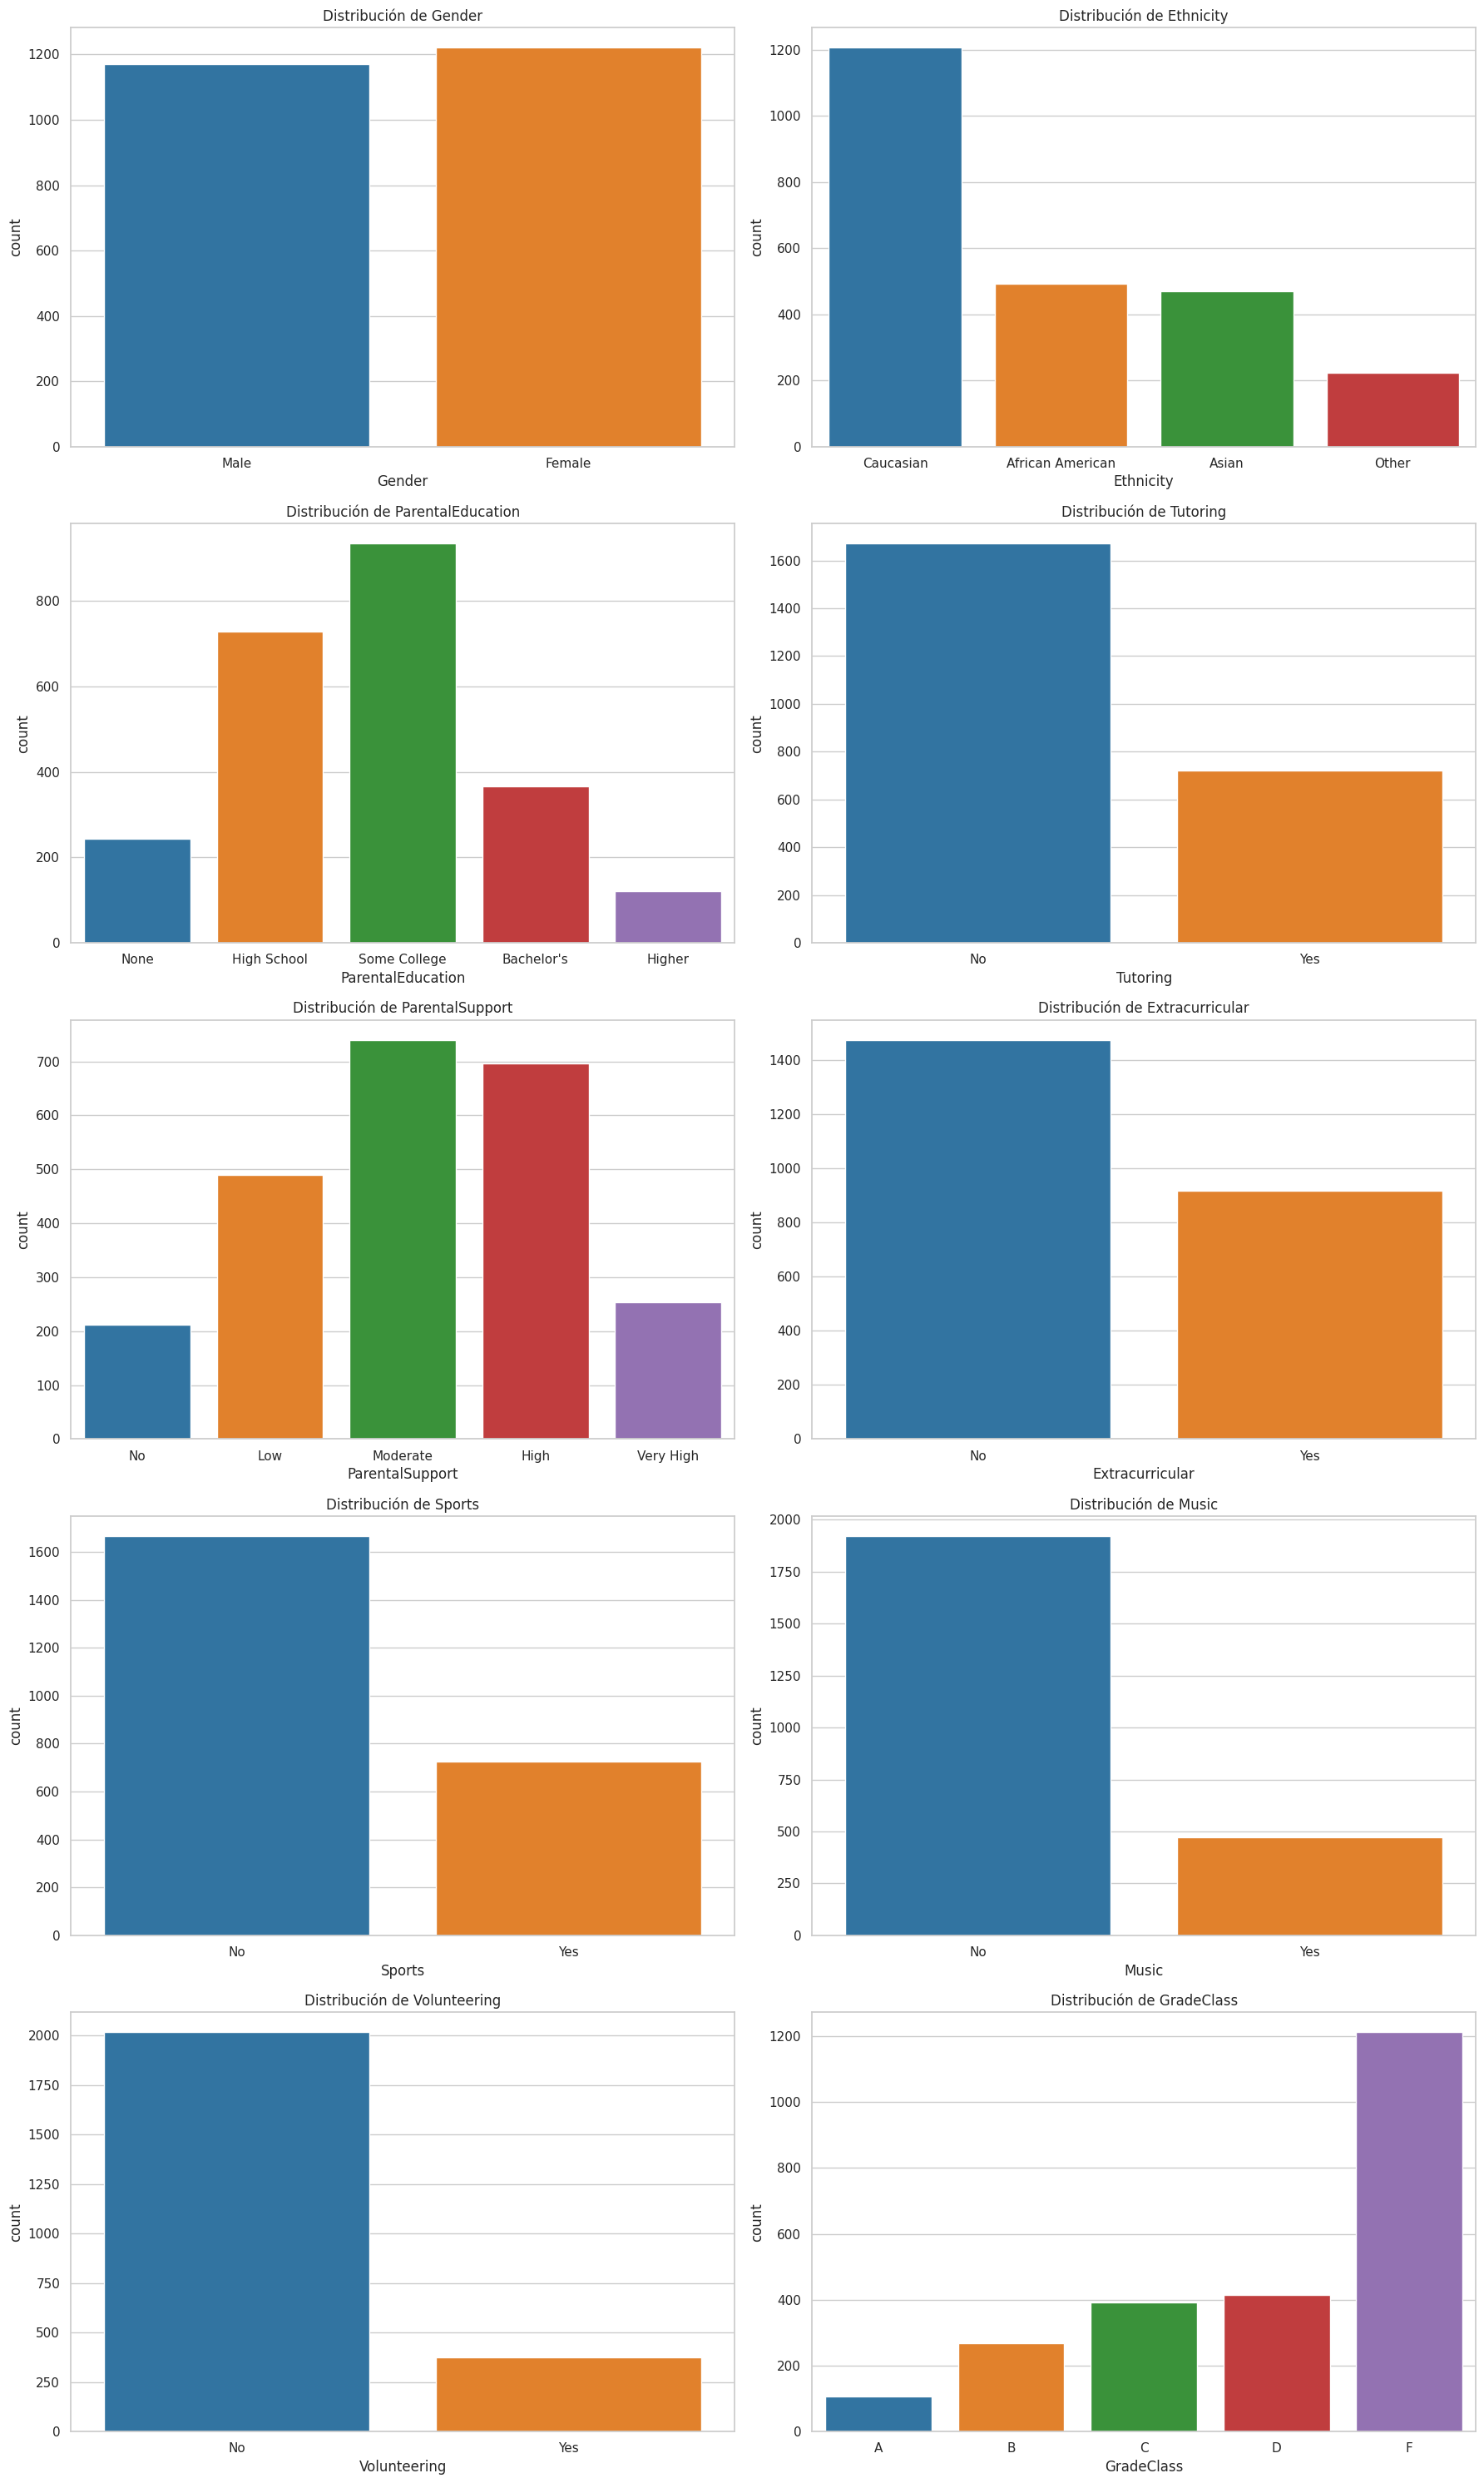

In [79]:
# Lista de columnas categóricas
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

# Etiquetas personalizadas para una mejor visualización
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female'],
    'GradeClass': ['A', 'B', 'C', 'D', 'F']
}

# Determinar el número de filas necesarias
num_cols = 2
num_rows = math.ceil(len(categorical_columns) / num_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

# Asegurarse de que axes sea una matriz bidimensional incluso si hay una sola fila
axes = axes.flatten()

# Crear un countplot para cada columna categórica con colores diferentes
for idx, column in enumerate(categorical_columns):
    ax = axes[idx]
    value_counts = df[column].value_counts()
    sns.countplot(data=df, x=column, ax=ax, palette=sns.color_palette("tab10", len(value_counts)))
    ax.set_title(f'Distribución de {column}')

    # Usar etiquetas personalizadas si están disponibles
    labels = custom_labels.get(column, df[column].unique())
    ticks = range(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

# Eliminar ejes vacíos si el número de subplots es mayor que el número de columnas categóricas
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()


Respecto a las variables categóricas se realizan las siguientes observaciones respecto a su distribución:


*   La columna *Gender* es la columna mas balanceada del set de datos.
*   En las columnas *Tutoring*, *Extracurricular*, *Sports*, *Music* y *Volunteering* predominan los datos con el valor *No*
* En la columna *Ethnicity* la mitad de los datos correponden a la etiqueta *Caucasian*
* En las columnas Parental Education y Parental Support, las etiquetas intermedias son las que poseen mayor cantidad de datos, en cambio las etiquetas de los extremos presentan menor cantidad de datos.
* En la columna objetivo *GradeClass* las mejores calificaciones son los que poseen una menor cantidad de datos y las peores calificaciones son las que poseen una mayor cantidad de datos. Cabe destacar que la calificaión F posee una cantidad significativamente mayor de datos, abarcando aproximadamente la mitad de los datos del conjunto de datos. Este desbalanceo podría generar un sesgo en el modelo clasificador a ser creado.




### Calificación de estudiantes por género y étnia

El siguiente fragmento de código crea dos gráficos de columnas apiladas para analizar la influencia del género y étnia de los estudiantes en las calificaiones obtenidas.

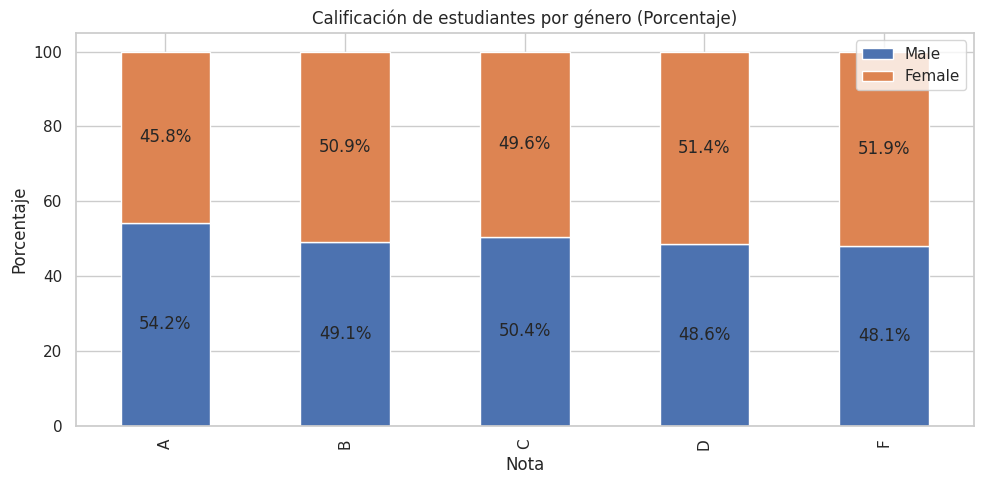

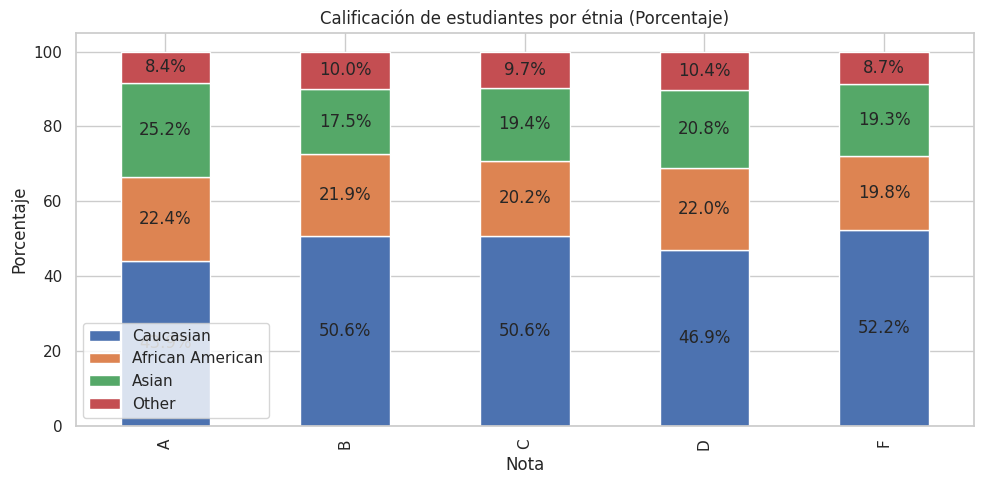

In [80]:
# Datos de Notas de estudiantes por género
df_grades = df.groupby('GradeClass')['Gender'].value_counts()
df_grades_unstacked = df_grades.unstack()

# Calcular los porcentajes
df_grades_percent = df_grades_unstacked.div(df_grades_unstacked.sum(axis=1), axis=0) * 100

# Primer gráfico: Notas de estudiantes por género (porcentaje)
ax1 = df_grades_percent.plot(kind='bar', stacked=True, figsize=(10, 5))
ax1.legend(custom_labels['Gender'])

# Usar etiquetas personalizadas del diccionario custom_labels
ax1.set_xticklabels(custom_labels['GradeClass'])

ax1.set_xlabel("Nota")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Calificación de estudiantes por género (Porcentaje)")

# Anotar los porcentajes en las barras
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()

# Datos de Notas de estudiantes por participación
df_participation = df.groupby('GradeClass')['Ethnicity'].value_counts()
df_participation_unstacked = df_participation.unstack()

# Calcular los porcentajes
df_participation_percent = df_participation_unstacked.div(df_participation_unstacked.sum(axis=1), axis=0) * 100

# Segundo gráfico: Notas de estudiantes por participación (porcentaje)
ax2 = df_participation_percent.plot(kind='bar', stacked=True, figsize=(10, 5))

# Usar etiquetas personalizadas del diccionario custom_labels
ax2.set_xticklabels(custom_labels['GradeClass'])
ax2.legend(custom_labels['Ethnicity'])

ax2.set_xlabel("Nota")
ax2.set_ylabel("Porcentaje")
ax2.set_title("Calificación de estudiantes por étnia (Porcentaje)")

# Anotar los porcentajes en las barras
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()


Como se puede observar en las calificaciones B,C, D y F la cantidad de hombres y mujeres que obtuvieron esas calificaciones son prácticamente equitativas no presentando una tendencia notable. En la calificación A se puede observar que una cantidad ligeramente mayor de hombres obtuvieron esta calificación.

Observando este gráfico al no existir una tendencia significativa no se puede concluir que el género por si solo sea un factor significativo para predecir las calificaciones de los estudiantes.

En el caso del segundo gráfico se observa que en cada una de las calificaciones la distribución de la étnia es similar a la distribución de los datos no clasificados por calificación. Es decir al no cambiar la distribución de la etnia al agrupar los datos por calificación se concluye que por si solo la étnia no es un factor significativo para predecir las notas de los estudiantes.

### Clasificación de estudiantes por porcentaje de ausencias

A continuación se crea un diagrama de barras paralelas para analizar la influencia del porcentaje de ausencia a clases de los estudiantes en sus calificaciones.

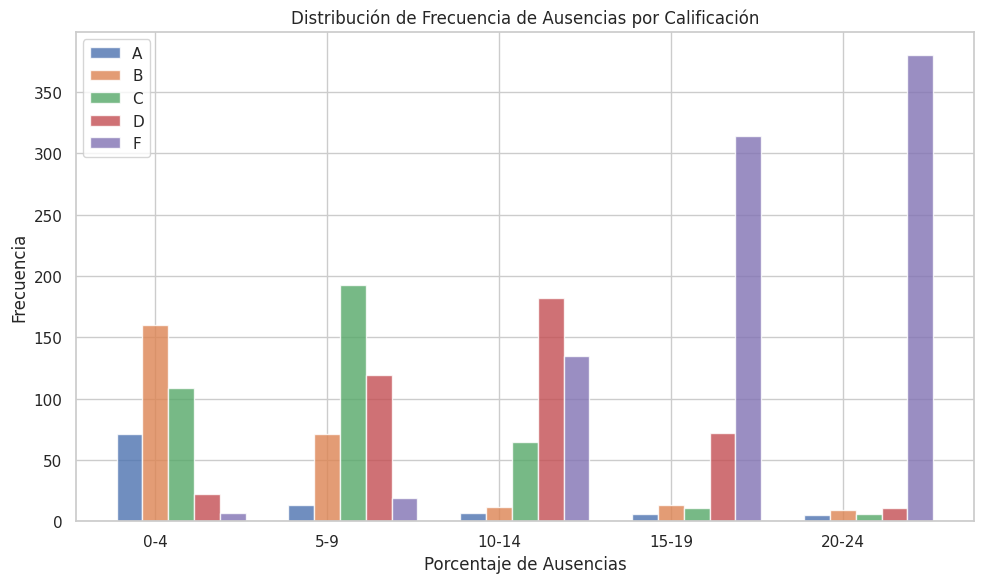

In [81]:
# Eliminar filas con valores NaN en la columna 'Absences'
cleaned_df = df.dropna(subset=['Absences'])

# Definir los intervalos
bins = range(0, 30, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Crear una nueva columna en el DataFrame con los intervalos
cleaned_df['Absences Interval'] = pd.cut(cleaned_df['Absences'], bins=bins, labels=labels, right=False)

# Calcular las frecuencias de los intervalos de asistencia para cada calificación
Absences_counts_A = cleaned_df[cleaned_df['GradeClass'] == 0.0]['Absences Interval'].value_counts().sort_index()
Absences_counts_B = cleaned_df[cleaned_df['GradeClass'] == 1.0]['Absences Interval'].value_counts().sort_index()
Absences_counts_C = cleaned_df[cleaned_df['GradeClass'] == 2.0]['Absences Interval'].value_counts().sort_index()
Absences_counts_D = cleaned_df[cleaned_df['GradeClass'] == 3.0]['Absences Interval'].value_counts().sort_index()
Absences_counts_F = cleaned_df[cleaned_df['GradeClass'] == 4.0]['Absences Interval'].value_counts().sort_index()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot de frecuencias de asistencia por calificación
bar_width = 0.15
x = range(len(bins) - 1)
ax.bar(x, Absences_counts_A.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.8, label='A')
ax.bar([i + bar_width for i in x], Absences_counts_B.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.8, label='B')
ax.bar([i + 2 * bar_width for i in x], Absences_counts_C.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.8, label='C')
ax.bar([i + 3 * bar_width for i in x], Absences_counts_D.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.8, label='D')
ax.bar([i + 4 * bar_width for i in x], Absences_counts_F.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.8, label='F')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Porcentaje de Ausencias')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Frecuencia de Ausencias por Calificación')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


Como se puede observar de los estudiantes que obtuvieron F como calificación, la significativa mayoría de ellos presentan un porcentaje alto de inasistencias. Para el caso de los estudiantes que obtuvieron A y B como calificación la mayor cantidad de ellos registran bajos niveles de inasistencias.

Por lo tanto este gráfico demuestra que la cantidad de inasistencia es un factor muy influyente en las calificaciones de los estudiantes.

### Distribución de horas de estudio por calificación

El siguiente fragmento de código crea un gráfico de la distribución de las horas de estudio por calificación.

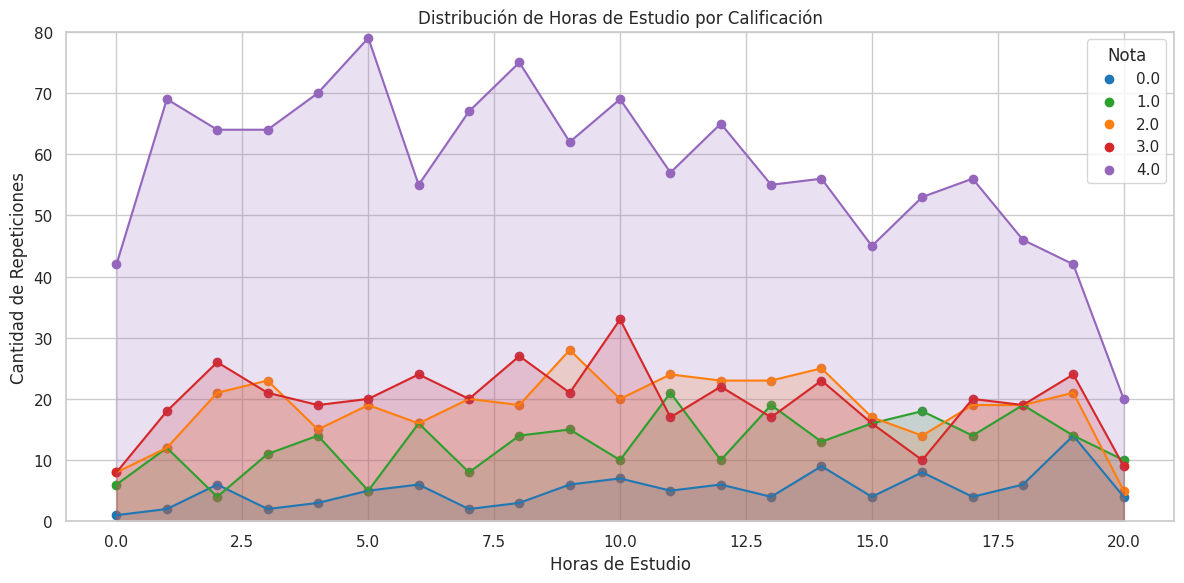

In [82]:
# Eliminar filas con valores NaN en la columna 'Study_Hours'
cleaned_df = df.dropna(subset=['StudyTimeWeekly'])

# Redondear las horas de estudio al entero más cercano
cleaned_df['StudyTimeWeekly'] = cleaned_df['StudyTimeWeekly'].apply(round)

# Agrupar los datos por horas de estudio y calificación, y contar las repeticiones de cada combinación
grouped_data = cleaned_df.groupby(['StudyTimeWeekly', 'GradeClass']).size().unstack(fill_value=0)

# Crear el scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

# Definir los colores para cada calificación
colors = {
    0.0: '#1f77b4',  # Azul - positivo
    1.0: '#2ca02c',  # Verde
    2.0: '#ff7f0e',  # Naranja
    3.0: '#d62728',  # Rojo
    4.0: '#9467bd'   # Púrpura - negativo
}


# Crear un scatter plot para cada calificación
for grade in grouped_data.columns:
    ax.scatter(grouped_data.index, grouped_data[grade], color=colors[grade], label=grade)

     # Unir los puntos de la misma categoría con líneas
    ax.plot(grouped_data.index, grouped_data[grade], color=colors[grade], linestyle='-')

     # Sombrear el área bajo la curva
    ax.fill_between(grouped_data.index, grouped_data[grade], color=colors[grade], alpha=0.2)

# Agregar etiquetas y título
# Configuración de las etiquetas y el título
ax.set_xlabel('Horas de Estudio')
ax.set_ylabel('Cantidad de Repeticiones')
ax.set_ylim(0,80)
ax.set_title('Distribución de Horas de Estudio por Calificación')
ax.legend(title='Nota')

plt.tight_layout()
plt.show()


No se logra identificar una tendencia clara de cómo la cantidad de horas de estudio influye en las calificaciones de los estudiantes.

### Diagrama de Violín

Ya que en el gráfico anterior no se pudo observar una tendencia clara comparando la cantidad de horas de estudio por calificación se agrega una variable más al análisis creando un diagrama de violín

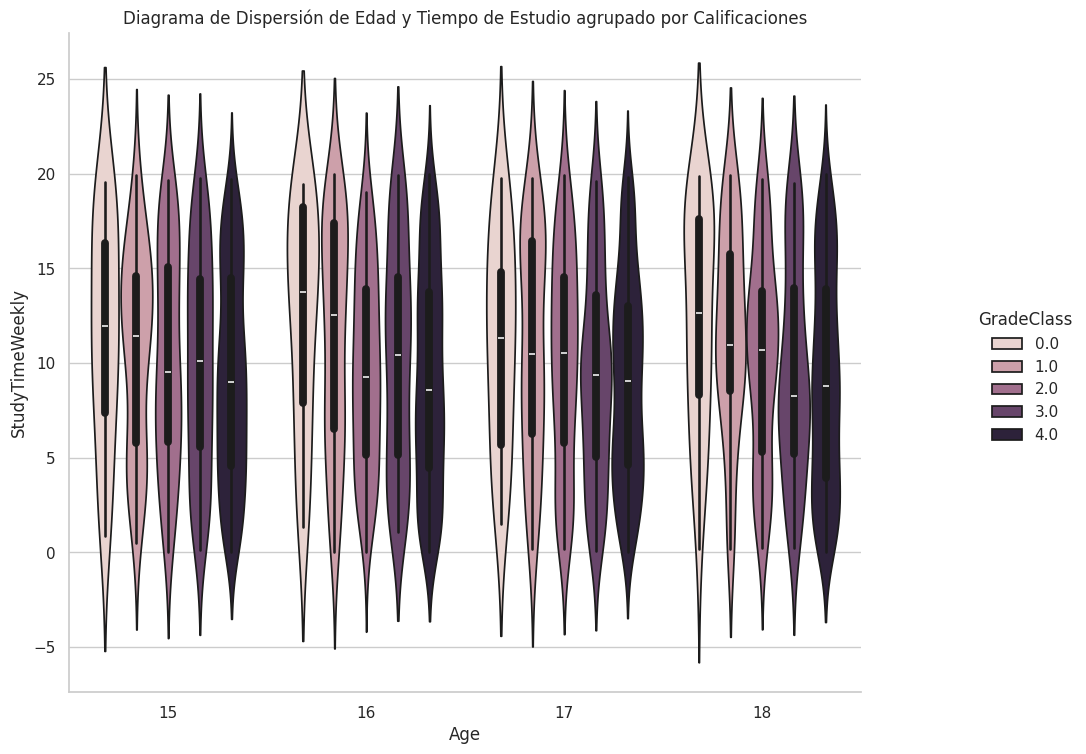

In [83]:
# Filtrar las filas donde no hay valores nulos en 'Time_Wasted_on_Social_Media', 'Screen_Time' y 'Grades'
df_filtered = df[['Age', 'StudyTimeWeekly', 'GradeClass']].dropna()

# Crear el diagrama de dispersión usando seaborn
sns.set(style="whitegrid")
scatter_plot = sns.catplot(data=df_filtered,
                               x='Age',
                               y='StudyTimeWeekly',
                               hue='GradeClass',
                               kind='violin')

# Configurar las etiquetas y el título del gráfico
scatter_plot.set(title='Diagrama de Dispersión de Edad y Tiempo de Estudio agrupado por Calificaciones',
                 xlabel='Age',
                 ylabel='StudyTimeWeekly')

# Mostrar el gráfico
scatter_plot.figure.set_size_inches(12, 8)
#scatter_plot.legend(title='Grades')
#sns.despine()
scatter_plot.figure.show()


## Preparación de los datos

### Manejo de valores nulos y outliers

Como se puede observar al ejecutar el siguiente fragmento de código, todas las  columnas del dataset contienen 2392 datos no nulos, lo cual corresponde al número total de filas del dataset. Por lo tanto este dataset no requiere tratamiento de valores nulos, ya que no existe ninguno en este.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


para identificar la presencia de outliers se crean diagramas de caja y bigotes de las variables numéricas utilizando el siguiente fragmento de código.

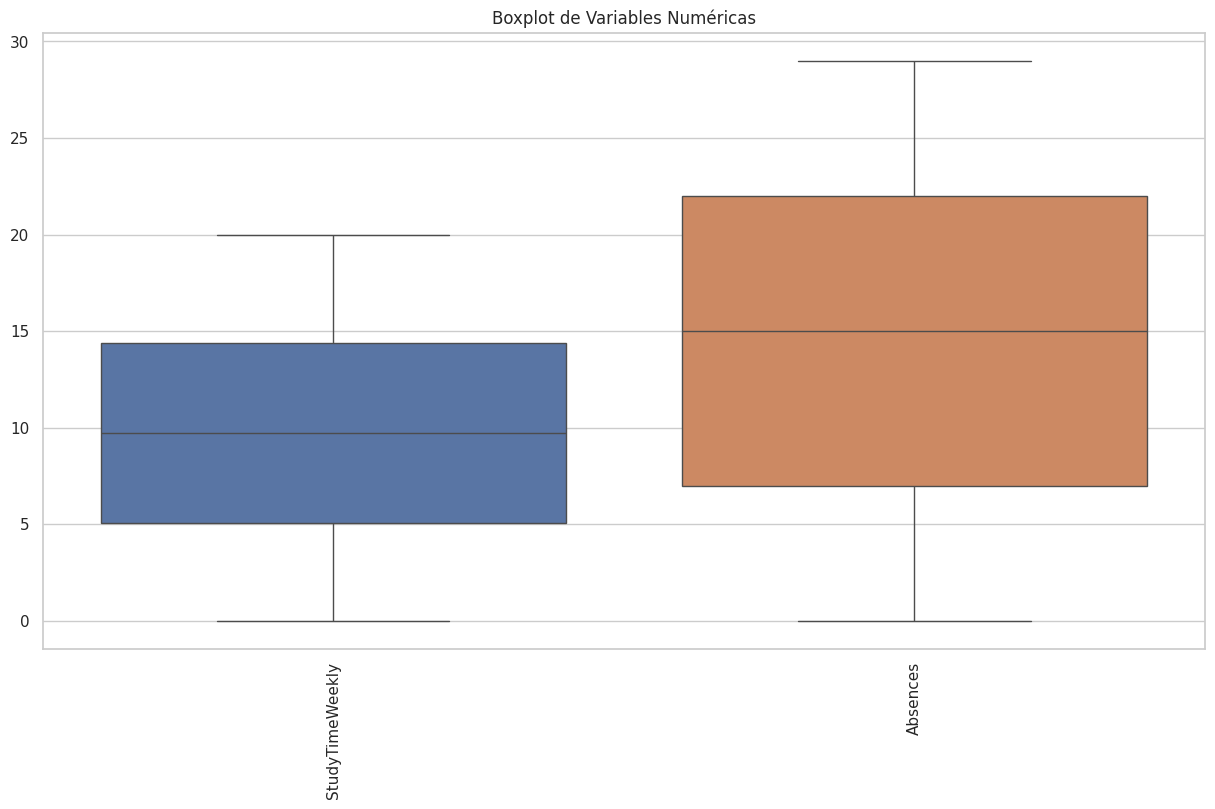

In [85]:
# Crear el boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title('Boxplot de Variables Numéricas')
plt.show()


Como se puede observar no existen datos que se encuentren mas allá de los bigotes, es decir, no existen datos que se encuentren a una distancia de la caja mayor a 1,5 veces el rango intercuartil. Por lo tanto este set de datos no posee outliers.

### Matriz de correlación de las variables

En los siguientes fragmentos de códigos se crea una matriz de correlación y de manera previa a la creación de esta se eliminan del dataset las columnas *StudentID* y *GPA*. La variable StudentID se elimina porque no entrega información relevante al ser solo un identificador. *GPA* se elimina porque la columna *GradeClass* se calcula en base a la variable *GPA*, por lo cual mantener la columna *GPA* implicaría mantener información redundante en nuestro dataset.

In [86]:
df = df.drop(columns=['StudentID','GPA'])

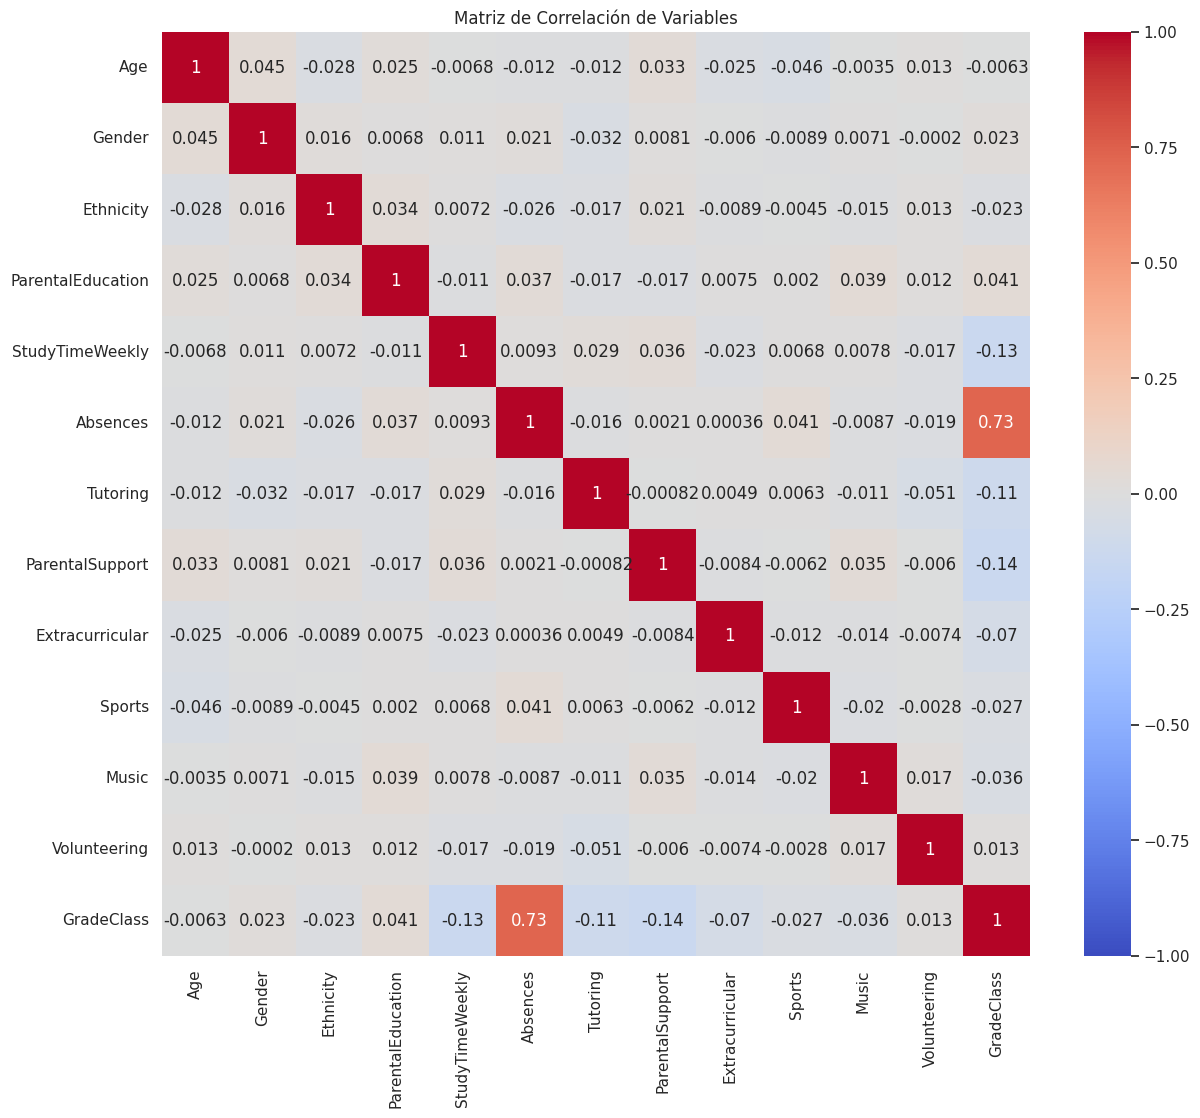

In [87]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar un tamaño más grande para la figura
plt.figure(figsize=(14, 12))

# Crear el mapa de calor con la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Matriz de Correlación de Variables')

# Mostrar el gráfico
plt.show()


Como se observa en la matriz de correlación, todas las variables independientes poseen valores de correlación muy pequeños entre ellos, lo cual asegura que cada uno está entregando información única.

Repecto a la variable objetivo se observa que GradeClass tiene una correlación muy alta con la columna *Absences* lo cual confirma lo observado en el gráfico generado en el análisis exploratorio de datos, donde se observa que la cantidad de ausencias es un valor muy importante para predecir las calificaciones de los estudiantes.

Se observa igualmente que las columnas StudyTimeWeekly, Tutoring, ParentalSupport y Extracurricular poseen una correlación pequeña pero no despreciable con la variable objetivo.

### Reducción de dimensionalidad

Para reducir la dimensionalidad del set de datos, se realiza por medio del siguinte fragmento de código un análisi de componentes principales para explicar el aporte de cada variable en la variablilidad de los datos.

Porcentaje de varianza explicada por cada componente
[0.09329006 0.0899149  0.08882075 0.08674823 0.08519023 0.08440268
 0.08266489 0.08064195 0.07998212 0.07890675 0.07673221 0.07270523]


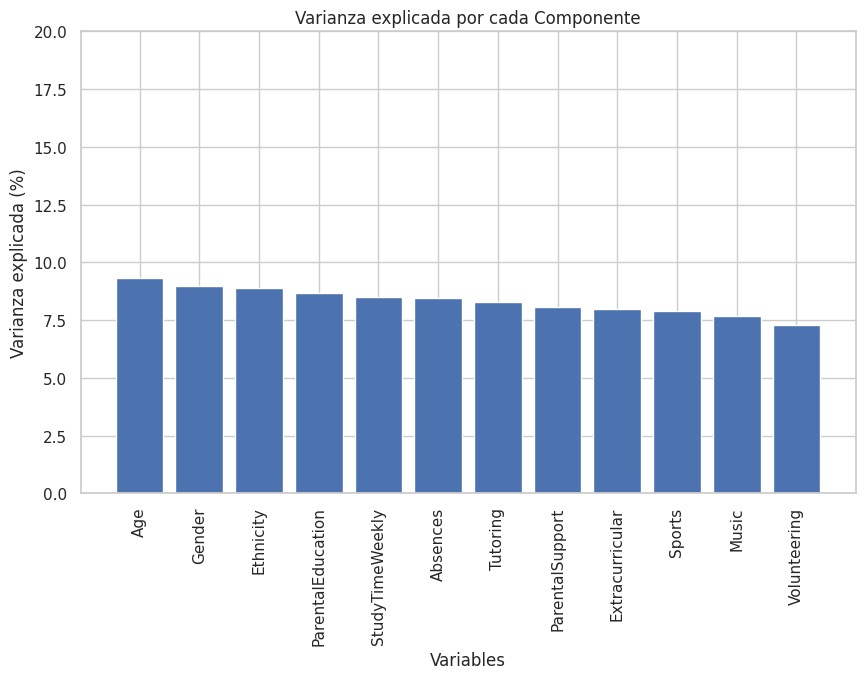

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Separar las variables predictoras de la variable objetivo
X = df.drop(columns=['GradeClass'])
#X = df[['StudyTimeWeekly', 'Absences', 'Tutoring','ParentalSupport']]
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

# Obtener los nombres de las variables
nombres_variables = X.columns

# Preparar el gráfico de barras
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Crear gráfico de barras para la varianza explicada por cada componente principal
ax.bar(x=np.arange(len(modelo_pca.explained_variance_ratio_)) + 1,
       height=modelo_pca.explained_variance_ratio_ * 100,  # Convertir a porcentaje
       tick_label=nombres_variables)

ax.set_title('Varianza explicada por cada Componente')
ax.set_xlabel('Variables')
ax.set_ylabel('Varianza explicada (%)')
ax.set_ylim(0,20)

plt.xticks(rotation=90)  # Rotar etiquetas del eje x para una mejor visualización
plt.grid(True)
plt.show()


Como se puede observar las columnas, *Sports*, *Music* y *Volunteering* son las tres columnas que menos explican la variabilidad del set de datos, por lo cual estas tres columnas. Se decide eliminar estas columnas para reducir la dimensionalidad del dataset.

In [89]:
df = df.drop(columns=['Sports','Music','Volunteering'])

## Creación de modelo de clasificación

En los siguientes fragmentos de código se crean los conjuntos de datos de entrenamiento y prueba. Debido al tamaño del dataset se decide considerar un 15% de los datos para testeo. Luego se crea y entrena el modelo de Machine Learning utilizando el algoritmo Random Forest.

In [90]:
from sklearn.model_selection import train_test_split

# Separar las variables predictoras de la variable objetivo
X = df.drop(columns=['GradeClass'])
y = df['GradeClass']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) # Ajusta test_size según sea necesario

print("Conjunto de entrenamiento (X_train):", X_train.shape)
print("Conjunto de prueba (X_test):", X_test.shape)
print("Etiquetas de entrenamiento (y_train):", y_train.shape)
print("Etiquetas de prueba (y_test):", y_test.shape)


Conjunto de entrenamiento (X_train): (2033, 9)
Conjunto de prueba (X_test): (359, 9)
Etiquetas de entrenamiento (y_train): (2033,)
Etiquetas de prueba (y_test): (359,)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)  # Puedes ajustar los hiperparámetros según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluación del modelo

Por último se evalua el desempeño del modelo entrenado por medio de un informe de clasificación y una matriz de confusión los cuales son generados con el siguiente fragmento de código.

Precisión del modelo: 0.724233983286908

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.75      0.18      0.29        17
         1.0       0.50      0.64      0.56        36
         2.0       0.60      0.54      0.57        59
         3.0       0.52      0.37      0.43        60
         4.0       0.84      0.96      0.90       187

    accuracy                           0.72       359
   macro avg       0.64      0.54      0.55       359
weighted avg       0.71      0.72      0.70       359



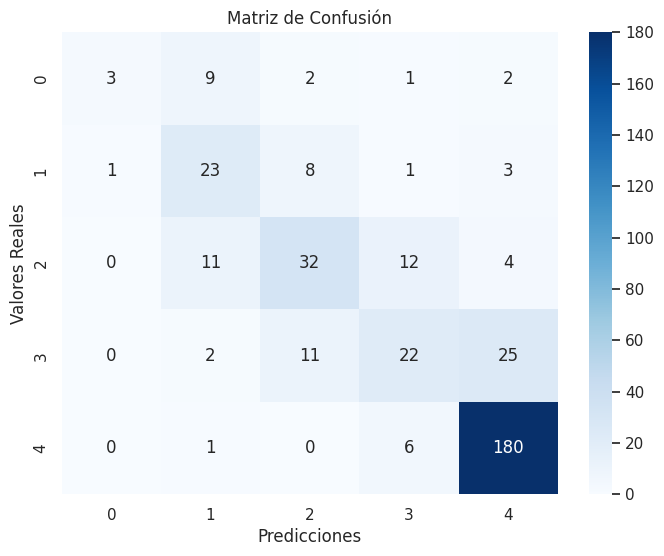

In [92]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:\n", report)

# Crear una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


Como se puede observar la precisión general del modelo es de 72%. Observando el desempeño por clase se puede observar que este modelo tiene una gran capacidad para predecir correctamente la calificación F (clase 4). Las calificaciones B y C (Clases 2 y 3 respectivamente) no poseen una calificación muy alta, sin embargo al observar la matriz de confusión se puede observar que la mayoría de las predicciones incorrectas se realizan en las notas adyascentes, por lo cual el modelo logra ser preciso en un rango de calificaciones. La calificación A es la que presenta menor rendimiento en la calificación.

El comportamiento anterior se atribuye a la escaces de datos en las calificaciones mas altas y a la abundancia de datos en las calificaciones mas bajas.

##Conclusiones

En base al análisis exploratorio de datos se puede concluir que la asistencia a clases es el factor mas importante a considerar para predecir las calificaciones de los estudiantes, por lo cual si se desea aumentar el desempeño general de los estudiantes es necesario reforzar ese aspecto en los alumnos.

El modelo de clasificación de calificaciones muestra un mejor desempeño en las calificaciones mas bajas y un menor desempeño en las calificaciones mas altas. Una recolección de datos adicionales que permita balancear la distribución de datos de la columna objetivo podría aumentar el desempeño del modelo clasificador, pudiendo realizar mejores predicciones en las calificaciones mas altas.